#                                          StarTravel Data Analysis

I have selected a data set from one of the Australian  based Travel company(last 2 month data). It is related to travelers are search hotels based on their preferences in around the world
 From that data set I will plan to address below questions and will provide answers by analysing data sets.
 
- What are the most popular destinations in the world ? 
- What are the guess pattern combinations when renting a Hotels?-
- What is the most popular stay period in properties?
- What are the most popular departure dates during the next year?
- What are the most popular search dates in data set?
- What are the most influential features of the dataset to Predict next 6 month travel in the world ?
- What can be predicted after post COVID ?



I have selected my own data set for this data analysis . Those are related one of travel company online booking system  data. There are 2 files

- startravel_1day.csv = This file is available 1 day data and that can be used for testing functionalities
- startrave.csv = This file available 2 month data(around 220000 rows) and that can be used for analysis and prediction.However when using this file it will take much time to running program and provide output.

- Note : There are  past 6 month data but it is unable to use due to file size being very large..



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
import math
%matplotlib inline

df_lis = pd.read_csv('startravel.csv')

 I would like to know about the dimentions of each dataset in above CSV.

In [47]:
#Below code gives information about the number of columns and number of rows.
print(df_lis.shape)

df_lis.head()

(216119, 27)


,searchDate,_time,region,channel,cur,srcCountry,adult,child,infant,totalPax,...,expand,nights,destinationType,destinationCode,contractID,vip,resultsCount,roomWise,roomCount,isRoomWise
0,5/1/2021,2021-05-01T10:24:04.717+0000,RAE,A,AUD,AU,1,0,0,1,...,"summary,detail",5,CITY,BME,0,False,200,False,0,False
1,5/1/2021,2021-05-01T10:09:18.786+0000,RAE,A,AUD,AU,1,0,0,1,...,"summary,detail",1,CITY,MEL,0,False,982,False,0,False
2,5/1/2021,2021-05-01T10:04:24.195+0000,RAE,A,AUD,AU,1,0,0,1,...,"summary,detail",1,CITY,OOL,0,False,779,False,0,False
3,5/1/2021,2021-05-01T10:04:04.199+0000,RAE,A,AUD,AU,1,0,0,1,...,"summary,detail",1,CITY,AURC,0,False,200,False,0,False
4,5/1/2021,2021-05-01T10:02:47.046+0000,RAE,A,AUD,AU,1,0,0,1,...,"summary,detail",1,CITY,OOL,0,False,779,False,0,False


The listings show each search criteria informations so I would like to know more about this dataset, starting with the column names and data types of each criteris.

In [49]:
#Below code show the data types and the number of these data types in the dataset
df_lis.dtypes.value_counts()

object    12
int64      9
bool       6
dtype: int64

In [50]:
#Below code show the name of the columns which are float64 data type
df_lis.dtypes[df_lis.dtypes=='float64']

Series([], dtype: object)

In [51]:
#Below code show the name of the columns which are int64 data type
df_lis.dtypes[df_lis.dtypes=='int64']

adult           int64
child           int64
infant          int64
totalPax        int64
bkgId           int64
nights          int64
contractID      int64
resultsCount    int64
roomCount       int64
dtype: object

In [52]:
#Below code show the name of the columns which are object data type
pd.set_option('display.max_rows', 92)
df_lis.dtypes[df_lis.dtypes=='object']

searchDate         object
_time              object
region             object
channel            object
cur                object
srcCountry         object
paxCombination     object
startDate          object
expand             object
destinationType    object
destinationCode    object
isRoomWise         object
dtype: object

There are many columns that are considered as object, yet some of they should be treated as integer or float (especially those nights columns.) This is a type change problem that I will handle later. For now I would like to know about the number missing values and number of unique inputs in each column.

In [53]:
#Below code shows the number of missing values in each column in descending order
df_lis.isnull().sum().sort_values(ascending=False)

isRoomWise         12594
channel               61
cur                   61
srcCountry            61
tax                    0
_time                  0
region                 0
adult                  0
child                  0
infant                 0
totalPax               0
paxCombination         0
quote                  0
startDate              0
roomCount              0
isUpdated              0
search                 0
bkgId                  0
expand                 0
nights                 0
destinationType        0
destinationCode        0
contractID             0
vip                    0
resultsCount           0
roomWise               0
searchDate             0
dtype: int64

In [54]:
#Below code shows the columns names that do not have any missing values and all values are unique (different from each other) 
df_lis.nunique()[df_lis.nunique()==len(df_lis)]

Series([], dtype: int64)

In [55]:
#Below code shows the columns names that have some missing values and number of unique values in that column
df_lis.nunique()[df_lis.nunique() != len(df_lis)].sort_values(ascending=False)

_time              216107
destinationCode      2709
bkgId                1596
resultsCount          859
startDate             623
paxCombination        179
nights                 95
searchDate             62
totalPax               31
adult                  28
child                  14
srcCountry              8
cur                     6
roomCount               6
infant                  5
region                  4
roomWise                2
isRoomWise              2
expand                  1
vip                     1
quote                   1
tax                     1
isUpdated               1
channel                 1
search                  1
contractID              1
destinationType         1
dtype: int64

### Question-1

When I look into the dataset, I can see **destinationCode** column which gives information about the where Travelers are  willing to travel in  around the world. So  I would like to know what are the most popular destinations in the world which people are willing to travel and stay. 
So the question is: What are the most popular destinations in the world for travellers?

The code in the below cell creates the list of destinations which are available. available.

In [56]:
#I first create an empty list to fill with destination available.
list_of_destination = []

#I create a for loop to append all destination values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_destination.append(df_lis['destinationCode'][i])

    
#In the dataset, so in order to take unique destination from the whole dataset
#I use the below code. I use the "set" function to make the destination unique and than convert the set into a list
#to remain consistency of data type.
list_of_destination = list((s.strip('\'\{\}') for s in list_of_destination))
list_of_destination_string = ",".join(list_of_destination)
list_of_destination = list(set(list_of_destination_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of destination.
#We have to remove that one from the list.
# without_empty_list_of_destination = []
# for string in list_of_destination:
#     if (string != ""):
#         without_empty_list_of_destination.append(string)
# list_of_destination = without_empty_list_of_destination
list_of_destination

['CA177',
 'ZUA',
 'KMH',
 'ALI',
 'GRL3',
 'US3482',
 'ABM',
 'AU2K',
 'AUZM',
 'CA148',
 'USME43',
 'AU229',
 'IUE',
 'KDW',
 'AULTP',
 'NZPK',
 'WAS',
 'QZD',
 'IDJI',
 'MTMD',
 'BSEX%20',
 'AUCAS',
 'NZNP',
 'AU570',
 'HSM',
 'AU643',
 'PHE',
 'GBPF',
 'USCA29',
 'RAR',
 'PZB',
 'AUKING',
 'US2039',
 'AU545',
 'AIT',
 'TR117',
 'PVR',
 'AU286',
 'NZHO',
 'TUO',
 'US776',
 'AUID',
 'SUSC',
 'SRN',
 'US941',
 'STX',
 'PEN',
 'AUAN',
 'FJV1',
 'AUA6',
 'XMQ',
 'ZABT',
 'THKY',
 'PBI',
 'NZMG',
 'PTET',
 'AU7V',
 'LAL',
 'DRV',
 'JRF',
 'AUWC',
 'AUJUND',
 'AUOL',
 'AUPYR',
 'US2087',
 'XTG',
 'OMN1',
 'US2808',
 'ALH',
 'WBU',
 'TH97',
 'NZAK',
 'TRY',
 'GMN',
 'CALO',
 'AMS',
 'XQU',
 'AUCP',
 'BE13',
 'ZA26',
 'MCY',
 'FJM1',
 'USFL50',
 'AUZ6',
 'CA225',
 'AU03',
 'NAA',
 'NZTEM',
 'DPO',
 'ZAGR',
 'AU2M',
 'XBR',
 'PSA',
 'ITPO',
 'FUL',
 'MIM',
 'AUWN',
 'EYS',
 'ZA32',
 'AUQ1',
 'AUZ4',
 'MFA',
 'AUSB',
 'TCI',
 'DNQ',
 'AUFK',
 'KRA',
 'TRF1',
 'YVE',
 'RTB',
 'CRPAP',
 'AUYT',

The code in the below cell is taken from one of the Udacity lecture notes (named: HowToBreakIntoTheField.py).
This function is used to count the number of destination in the destinations list.

In [57]:
def total_count(df, col1, col2, look_for,order):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=order, inplace=True)
    return new_df

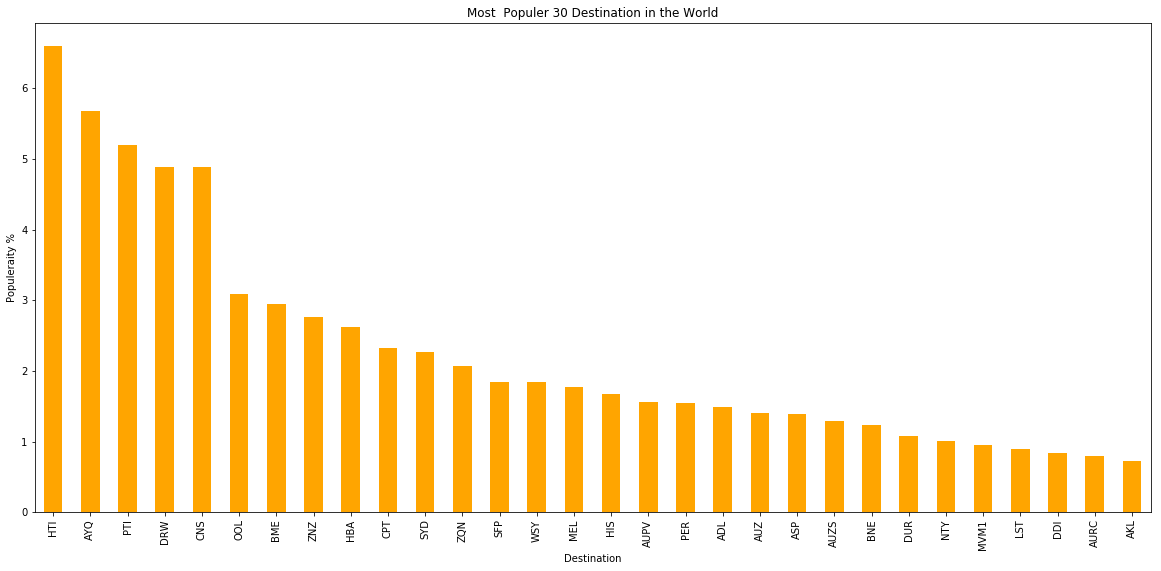

In [59]:
#I create a dataframe named study, which has lists of destinations as one column and the count of these destinations lists
#in our main (df_lis)
study = df_lis['destinationCode'].value_counts().reset_index()
study.rename(columns={'index': 'destinationCode', 'destinationCode': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique destination in the destinations list.
study_df_most_pop = total_count(study, 'destinationCode', 'count', list_of_destination,False)
study_df_most_pop.set_index('destinationCode', inplace=True)

# print (study_df_most_pop)

#Here I create a bar chart to show the percentage of each destination from the most common to the least common.
(study_df_most_pop/len(df_lis)*100)[:30].plot(kind='bar', legend=None,  color='orange');
plt.title('Most  Populer 30 Destination in the World');
plt.ylabel('Populeraity %')
plt.xlabel('Destination')
plt.rcParams["figure.figsize"] = (20,9)
plt.show()

#Here with the total_count function, I count the number of unique destination in the destinations list.
# study_df_least_pop = total_count(study, 'destinationCode', 'count', list_of_destination,True)
# study_df_least_pop.set_index('destinationCode', inplace=True)


# # #Here I create a bar chart to show the percentage of each destination from the most common to the least common.
# (study_df_least_pop/len(df_lis)*100)[:50].plot(kind='bar', legend=None);
# plt.title('Least Populer 30 Destination in the World');
# plt.ylabel('Populeraity %')
# plt.xlabel('Destination')
# plt.rcParams["figure.figsize"] = (20,3)
# plt.show()

In the above chart you can see that the most populer destinations are:

- HTI = Hamilton Island, Australia
- AYQ = Ayers Rock, Australia
- PTI = Port Douglas, Australia
- CNS = Cairns, Australia
- DRW = Darwin, Australia
- OOL = Gold Coast, Australia



### Question-2
When I look into the dataset, I can see more important features like Travelers preferred **pax combinations**. adult,child and infant  column which gives information about the where guest combination for trip. So I would like to know what are the most popular pax combination when guest are planning a trip. So the question is: What are the guess pattern combinations when  renting a Hotels?

The code in the below cell creates the list of pax combinations which are available.


In [60]:
#I first create an empty list to fill with pax combination available.
list_of_pax = []

#I create a for loop to append all pax combination values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_pax.append(df_lis['paxCombination'][i])
   
#In the dataset, so in order to take unique destination from the whole dataset
#I use the below code. I use the "set" function to make the pax combination unique and than convert the set into a list
#to remain consistency of data type.
list_of_pax = list((s.strip('\'\{\}') for s in list_of_pax))
list_of_pax_string = ",".join(list_of_pax)
list_of_pax = list(set(list_of_pax_string.split(",")))
list_of_pax

['12_0_0',
 '1_2_0',
 '29_0_0',
 '3_0_2',
 '8_2_0',
 '1_5_0',
 '4_1_2',
 '1_1_0',
 '14_3_1',
 '3_3_0',
 '3_4_0',
 '5_2_0',
 '22_0_0',
 '5_3_1',
 '2_1_1',
 '7_2_0',
 '6_1_2',
 '6_0_0',
 '4_5_1',
 '17_6_0',
 '30_0_0',
 '6_3_1',
 '2_2_0',
 '9_5_0',
 '10_0_1',
 '6_6_0',
 '8_0_1',
 '6_0_2',
 '3_0_1',
 '2_1_2',
 '7_0_2',
 '7_3_0',
 '13_0_0',
 '5_1_2',
 '9_2_0',
 '6_4_0',
 '25_0_0',
 '4_0_1',
 '6_1_1',
 '3_12_0',
 '3_4_1',
 '5_7_0',
 '4_2_1',
 '7_0_1',
 '3_3_1',
 '6_1_0',
 '11_2_1',
 '8_4_0',
 '15_2_0',
 '7_3_1',
 '8_3_1',
 '2_0_1',
 '12_1_0',
 '5_0_2',
 '3_1_2',
 '24_0_0',
 '3_2_1',
 '4_4_0',
 '2_5_1',
 '4_0_2',
 '8_8_0',
 '8_5_0',
 '2_5_0',
 '1_4_0',
 '2_2_2',
 '4_6_0',
 '8_3_0',
 '16_0_0',
 '6_9_0',
 '41_0_0',
 '6_2_0',
 '2_1_5',
 '4_0_0',
 '10_0_2',
 '8_0_0',
 '4_0_3',
 '4_3_2',
 '10_11_0',
 '10_3_1',
 '10_4_2',
 '5_5_0',
 '8_3_2',
 '4_12_0',
 '6_2_1',
 '1_0_1',
 '2_1_0',
 '3_5_0',
 '2_4_0',
 '9_0_1',
 '20_0_0',
 '5_0_0',
 '3_5_1',
 '10_1_2',
 '39_0_0',
 '40_0_0',
 '5_4_0',
 '14_15_0',
 '

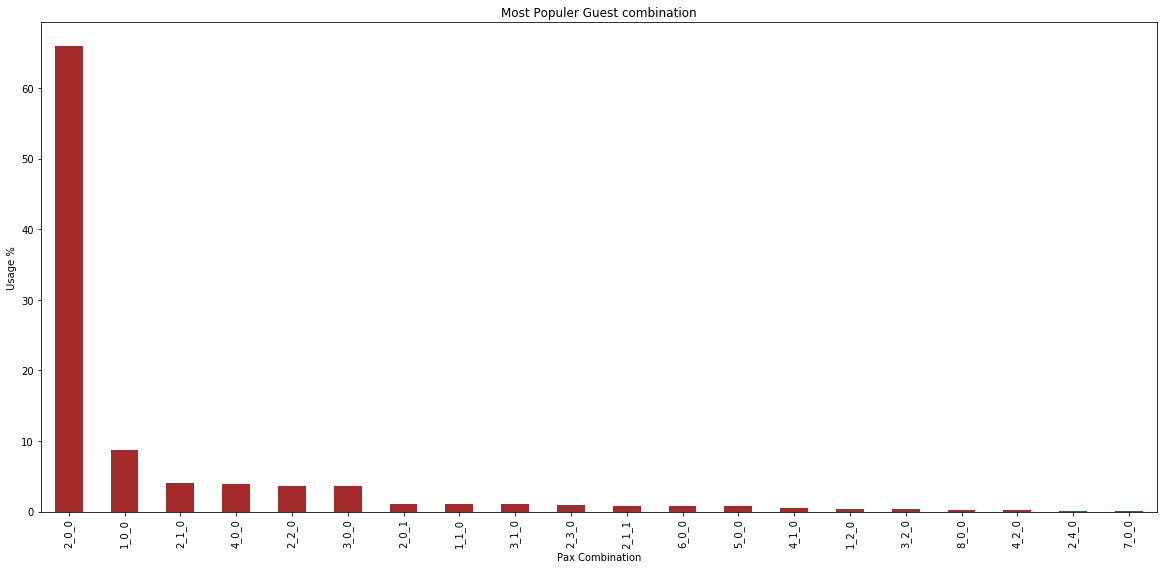

In [61]:
#I create a dataframe named study, which has lists of pax combination as one column and the count of these pax combination lists
#in our main (df_lis)
study = df_lis['paxCombination'].value_counts().reset_index()
study.rename(columns={'index': 'paxCombination', 'paxCombination': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique pax combination in the pax combination list.
study_df_pax = total_count(study, 'paxCombination', 'count', list_of_pax,False)
study_df_pax.set_index('paxCombination', inplace=True)


#Here I create a bar chart to show the percentage of each pax combination from the most common to the least common.
(study_df_pax/len(df_lis)*100)[:20].plot(kind='bar', legend=None,  color='brown');
plt.title('Most Populer Guest combination');
plt.ylabel('Usage %')
plt.xlabel('Pax Combination')
plt.rcParams["figure.figsize"] = (20,9)
plt.show()


In the above chart you can see that the most populer pax combinations are as given below. You can see around 70% of combinations are 2_0_0.

- 2_0_0
- 1_0_0
- 2_1_0
- 4_0_1
- 2_2_0

###  Question-3
When I look into the dataset, I can see another important feature like Travelers preferred **stay duration**. nights column which gives information about the where guest stay period at hotels. So the question is: What is the most popular stay period  when renting a Hotel?

The code in the below cell creates the list of stay periods(nights) available.


In [62]:
#I first create an empty list to fill with nights available.
list_of_nights = []

df_lis['nights'] = list(map(str, df_lis['nights']))

#I create a for loop to append all nights values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_nights.append(df_lis['nights'][i])

    
#In the dataset, so in order to take unique nights from the whole dataset
#I use the below code. I use the "set" function to make the nights unique and than convert the set into a list
#to remain consistency of data type.
list_of_nights = list((s.strip('\'\{\}') for s in list_of_nights))
list_of_nights_string = ",".join(list_of_nights)
list_of_nights = list(set(list_of_nights_string.split(",")))

list_of_nights

['184',
 '38',
 '368',
 '3',
 '36',
 '214',
 '42',
 '19',
 '222',
 '4',
 '33',
 '13',
 '1097',
 '29',
 '6',
 '84',
 '127',
 '139',
 '113',
 '12',
 '80',
 '251',
 '40',
 '41',
 '39',
 '91',
 '24',
 '44',
 '70',
 '54',
 '22',
 '1161837',
 '95',
 '81',
 '67',
 '62',
 '122',
 '219',
 '377',
 '274',
 '60',
 '178',
 '26',
 '89',
 '78',
 '34',
 '37',
 '17',
 '737',
 '100',
 '31',
 '150',
 '119',
 '2',
 '1',
 '25',
 '374',
 '51',
 '16',
 '61',
 '339',
 '46',
 '35',
 '32',
 '64',
 '14',
 '56',
 '30',
 '8',
 '98',
 '53',
 '183',
 '20',
 '28',
 '5',
 '10',
 '18',
 '186',
 '85',
 '23',
 '48',
 '7',
 '63',
 '21',
 '130',
 '15',
 '93',
 '27',
 '140',
 '49',
 '11',
 '96',
 '366',
 '9',
 '90']

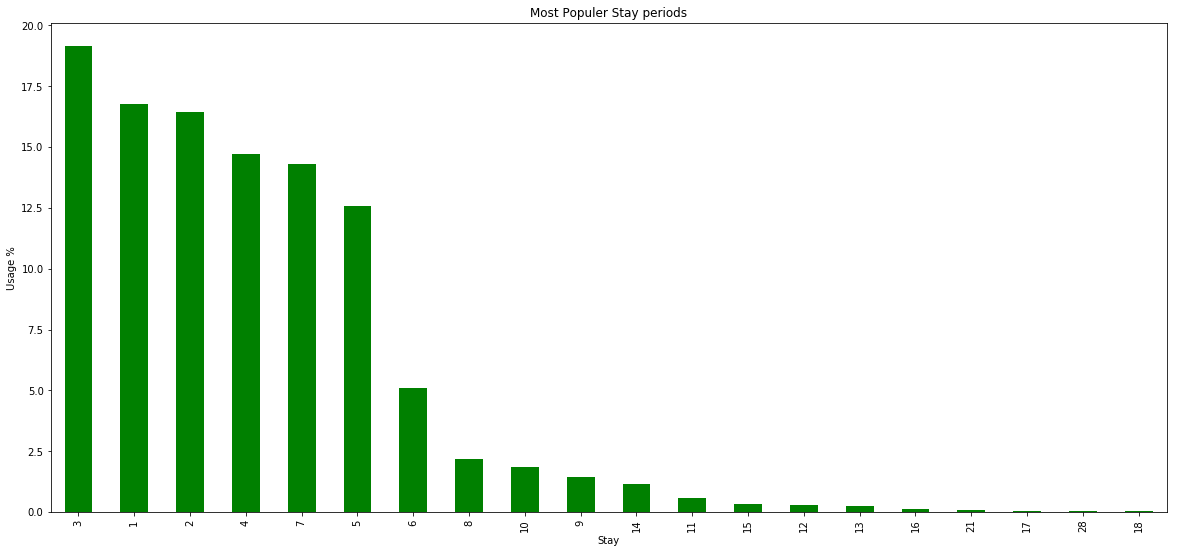

In [63]:
#I create a dataframe named study, which has lists of nights as one column and the count of these nights lists
#in our main (df_lis)
study = df_lis['nights'].value_counts().reset_index()
study.rename(columns={'index': 'nights', 'nights': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique night in the nights list.
study_df_most_pop = total_count(study, 'nights', 'count', list_of_nights,False)
study_df_most_pop.set_index('nights', inplace=True)

# print (study_df_most_pop)

#Here I create a bar chart to show the percentage of each night from the most common to the least common.
(study_df_most_pop/len(df_lis)*100)[:20].plot(kind='bar', legend=None , color='green');
plt.title('Most Populer Stay periods');
plt.ylabel('Usage %')
plt.xlabel('Stay')
plt.rcParams["figure.figsize"] = (20,7)

plt.show()


In the above chart you can see that the most populer stay periods are as given below. You can see around 17% of stay period is under 1 night.

- 3 nights
- 1 night
- 2 nights
- 4 nights
- 7 nights

###  Question-4
When I look into the dataset, I can see another important feature like Travelers preferred **departure dates** . startDate column which gives information about when  guests are willing to  travel. So the question is: What are the most popular departure dates during the next year?

The code in the below cell creates the list of starDate which are  available.


In [64]:
#I first create an empty list to fill with startDate available.
list_of_dates = []

df_lis['startDate'] = list(map(str, df_lis['startDate']))

#I create a for loop to append all nights values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_dates.append(df_lis['startDate'][i])

    
#In the dataset, so in order to take unique startDate from the whole dataset
#I use the below code. I use the "set" function to make the startDate unique and than convert the set into a list
#to remain consistency of data type.
list_of_dates = list((s.strip('\'\{\}') for s in list_of_dates))
list_of_dates_string = ",".join(list_of_dates)
list_of_dates = list(set(list_of_dates_string.split(",")))

list_of_dates

['6/22/2021',
 '9/27/2021',
 '9/13/2021',
 '3/12/2022',
 '3/15/2022',
 '4/9/2023',
 '5/28/2022',
 '9/2/2022',
 '1/21/2022',
 '9/1/2022',
 '11/13/2022',
 '11/15/2022',
 '7/26/2022',
 '8/31/2021',
 '4/16/2022',
 '8/17/2021',
 '12/13/2022',
 '7/25/2021',
 '5/1/2022',
 '12/12/2021',
 '1/8/2022',
 '6/18/2022',
 '9/19/2022',
 '3/21/2022',
 '12/27/2021',
 '1/20/2022',
 '9/16/2022',
 '8/18/2022',
 '4/9/2021',
 '12/4/2021',
 '8/13/2022',
 '5/18/2022',
 '12/22/2022',
 '7/13/2022',
 '12/11/2021',
 '7/20/2021',
 '3/20/2021',
 '3/22/2022',
 '5/9/2021',
 '8/1/2022',
 '12/10/2021',
 '5/17/2021',
 '11/2/2021',
 '3/16/2022',
 '1/1/2022',
 '10/1/2021',
 '4/23/2022',
 '7/28/2021',
 '6/3/2021',
 '11/1/2021',
 '3/8/2022',
 '2/13/2023',
 '4/22/2022',
 '10/8/2021',
 '1/2/2022',
 '4/21/2022',
 '11/19/2021',
 '11/12/2022',
 '6/29/2021',
 '8/8/2021',
 '6/26/2021',
 '3/19/2021',
 '1/8/2023',
 '3/29/2021',
 '10/30/2021',
 '9/7/2021',
 '1/14/2022',
 '11/27/2021',
 '1/24/2022',
 '4/23/2021',
 '4/26/2022',
 '4/21/20

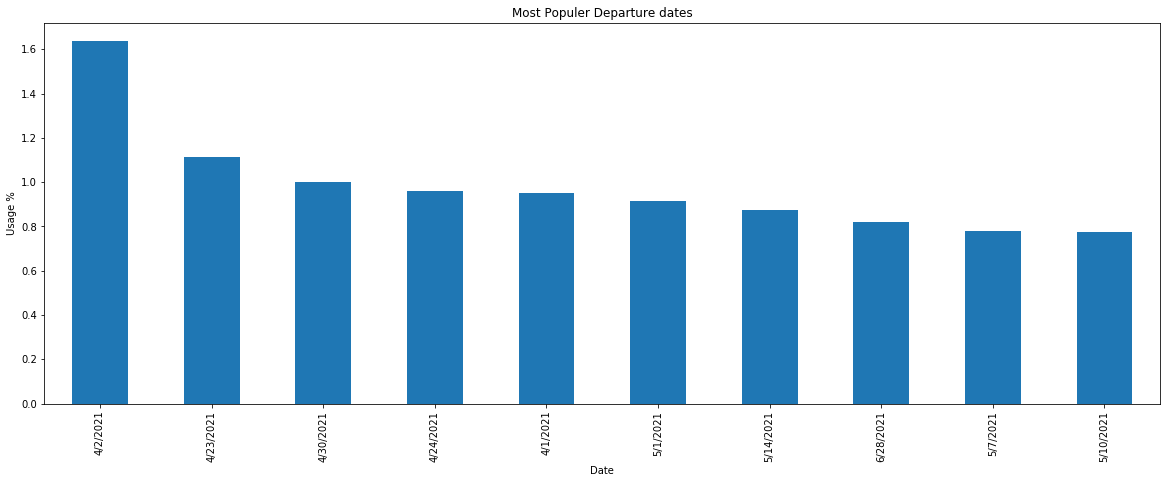

In [65]:
#I create a dataframe named study, which has lists of startDate as one column and the count of these startDates lists
#in our main (df_lis)
study = df_lis['startDate'].value_counts().reset_index()
study.rename(columns={'index': 'startDate', 'startDate': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique startDate in the nights list.
study_df_most_pop = total_count(study, 'startDate', 'count', list_of_dates,False)
study_df_most_pop.set_index('startDate', inplace=True)

# print (study_df_most_pop)

#Here I create a bar chart to show the percentage of each startDate from the most common to the least common.
(study_df_most_pop/len(df_lis)*100)[:10].plot(kind='bar', legend=None);
plt.title('Most Populer Departure dates');
plt.ylabel('Usage %')
plt.xlabel('Date')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()


### Question-5
When I look into the dataset, I can see another important feature like Travelers hotel searching dates . searchDate column which gives information about when guests are searching hotels to stay. So the question is: What are the most popular search  dates during ?

The code in the below cell creates the list of searchDate which are available.

In [66]:
#I first create an empty list to fill with startDate available.
list_of_searchdates = []

df_lis['searchDate'] = list(map(str, df_lis['searchDate']))

#I create a for loop to append all nights values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_searchdates.append(df_lis['searchDate'][i])

    
#In the dataset, so in order to take unique startDate from the whole dataset
#I use the below code. I use the "set" function to make the startDate unique and than convert the set into a list
#to remain consistency of data type.
list_of_searchdates = list((s.strip('\'\{\}') for s in list_of_searchdates))
list_of_searchdates_string = ",".join(list_of_searchdates)
list_of_searchdates = list(set(list_of_searchdates_string.split(",")))


In [67]:
def total_count_x(df, col1, col2, look_for,order):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('searchDate', ascending=order, inplace=True)
    return new_df

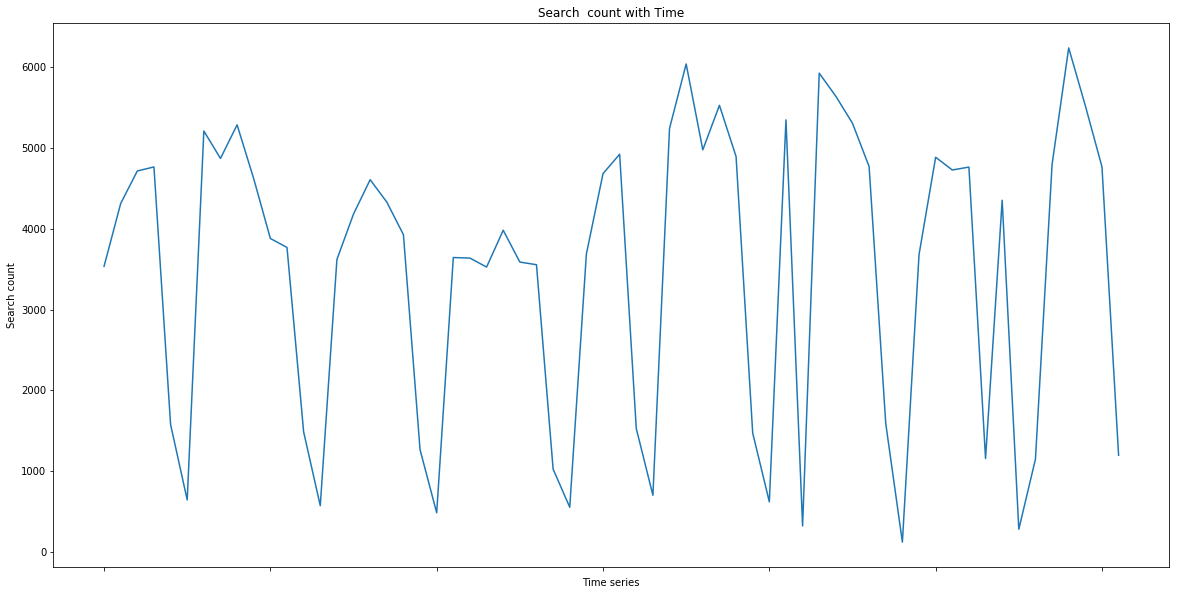

In [70]:
#I create a dataframe named study, which has lists of searchDate as one column and the count of these searchDates lists
#in our main (df_lis)
study = df_lis['searchDate'].value_counts().reset_index()
study.rename(columns={'index': 'searchDate', 'searchDate': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique startDate in the nights list.
study_df_most_pop = total_count_x(study, 'searchDate', 'count', list_of_searchdates,True)
#print(study_df_most_pop)
study_df_most_pop.set_index('searchDate', inplace=True)



#Here I create a bar chart to show the percentage of each startDate from the most common to the least common.
(study_df_most_pop).plot(legend=None);
plt.title('Search  count with Time');
plt.ylabel('Search count')
plt.xlabel('Time series')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [71]:

study = df_lis['searchDate'].value_counts().reset_index()
study.rename(columns={'index': 'searchDate', 'searchDate': 'count'}, inplace=True)

#Here with the total_count function, I count the number of unique startDate in the nights list.
date_series = total_count_x(study, 'searchDate', 'count', list_of_searchdates,True)
date_series.set_index('searchDate', inplace=True)

date_series.head()

,count
searchDate,
3/1/2021,3537
3/10/2021,4315
3/11/2021,4718
3/12/2021,4768
3/13/2021,1578


### Question-6
There are so many features in the dataset, that has effect on the Hotel demanding. In the 5th question  I would like to train a model to predict  the demanding parameters for hotels. 

First I would like to know about the number of missing values in the features that are related to demarding.


In [45]:

print(df_lis['startDate'].isnull().sum())
print(df_lis['destinationCode'].isnull().sum())
print(df_lis['paxCombination'].isnull().sum())
print(df_lis['nights'].isnull().sum())



1
1
1
1


In the code cell above, I did not find the number of null values in each column. 

There are four   different parameters that can  predict Hotel guest demand  in the dataset, which are listed below.

- startDate
- destinationCode
- paxCombination
- nights

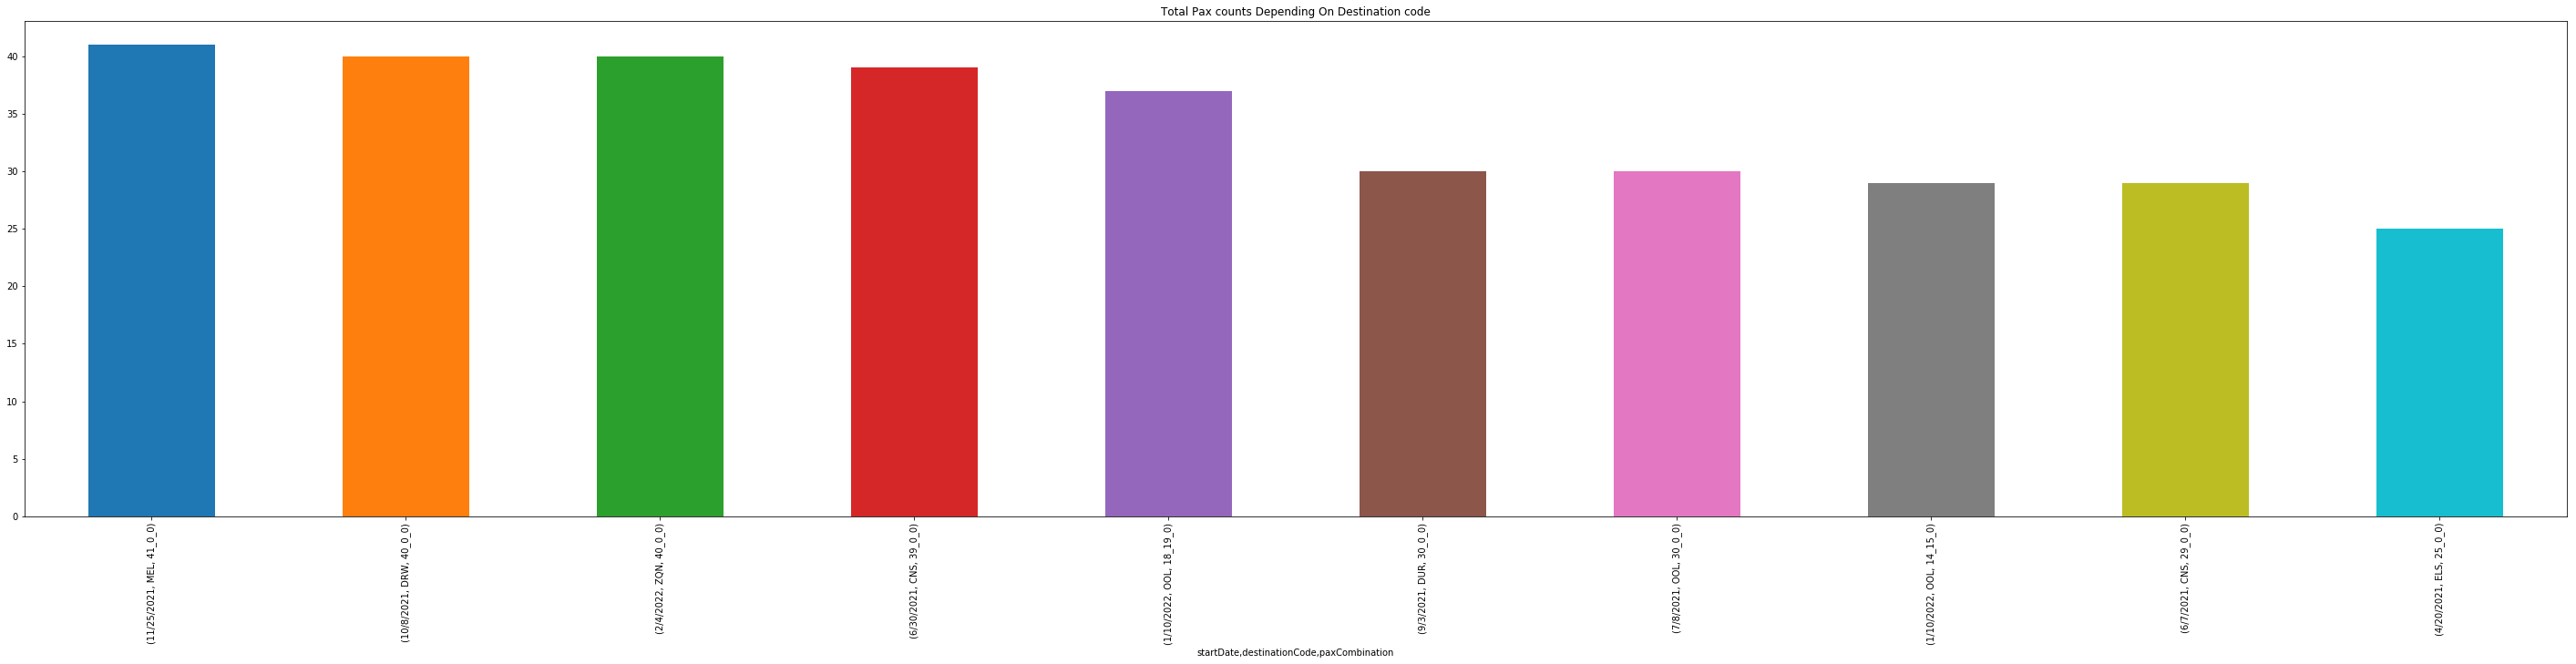

In [27]:
#Below code plots the total pax  of different Departure and destination and pax combination
(df_lis.groupby(['startDate','destinationCode','paxCombination'])['totalPax'].mean().sort_values(ascending=False))[:10].plot(kind='bar', legend=None)
plt.title('Total Pax counts Depending On Destination code');
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

In [25]:

features_of_search = ['startDate','destinationCode','paxCombination', 'totalPax', 'adult', 'child', 'infant']

df_lis_sub=df_lis[features_of_search]
df_lis_sub.sort_values('totalPax',ascending=False).head()



,startDate,destinationCode,paxCombination,totalPax,adult,child,infant
210759,11/25/2021,MEL,41_0_0,41.0,41.0,0.0,0.0
210757,2/4/2022,ZQN,40_0_0,40.0,40.0,0.0,0.0
210758,10/8/2021,DRW,40_0_0,40.0,40.0,0.0,0.0
200456,6/30/2021,CNS,39_0_0,39.0,39.0,0.0,0.0
22706,1/10/2022,OOL,18_19_0,37.0,18.0,19.0,0.0


In [26]:
df_lis_sub_group = df_lis_sub.groupby(['startDate','destinationCode','paxCombination']).sum().sort_values('totalPax',ascending=False)
df_lis_sub_group.head()

,,,totalPax,adult,child,infant
startDate,destinationCode,paxCombination,,,,
4/2/2021,CPT,2_0_0,444.0,444.0,0.0,0.0
4/27/2021,ZNZ,2_0_0,292.0,292.0,0.0,0.0
5/3/2021,HTI,2_0_0,292.0,292.0,0.0,0.0
4/20/2021,ZNZ,2_0_0,264.0,264.0,0.0,0.0
6/29/2021,CNS,2_2_0,260.0,130.0,130.0,0.0


In [27]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_sub_group['totalPax']
X = df_lis_sub_group.drop(columns='totalPax')


In [28]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [29]:
#Applying the RandomForestRegressor, fitting the model, making predictions with the test set and scoring the success of the model
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.994797157801
0.909220549386



I want to investigate about the coefficients of my model. 

In [30]:

coefs_df = pd.DataFrame()

coefs_df['PaxType'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,PaxType,Coefs
0,adult,0.969352
1,child,0.029229
2,infant,0.001418


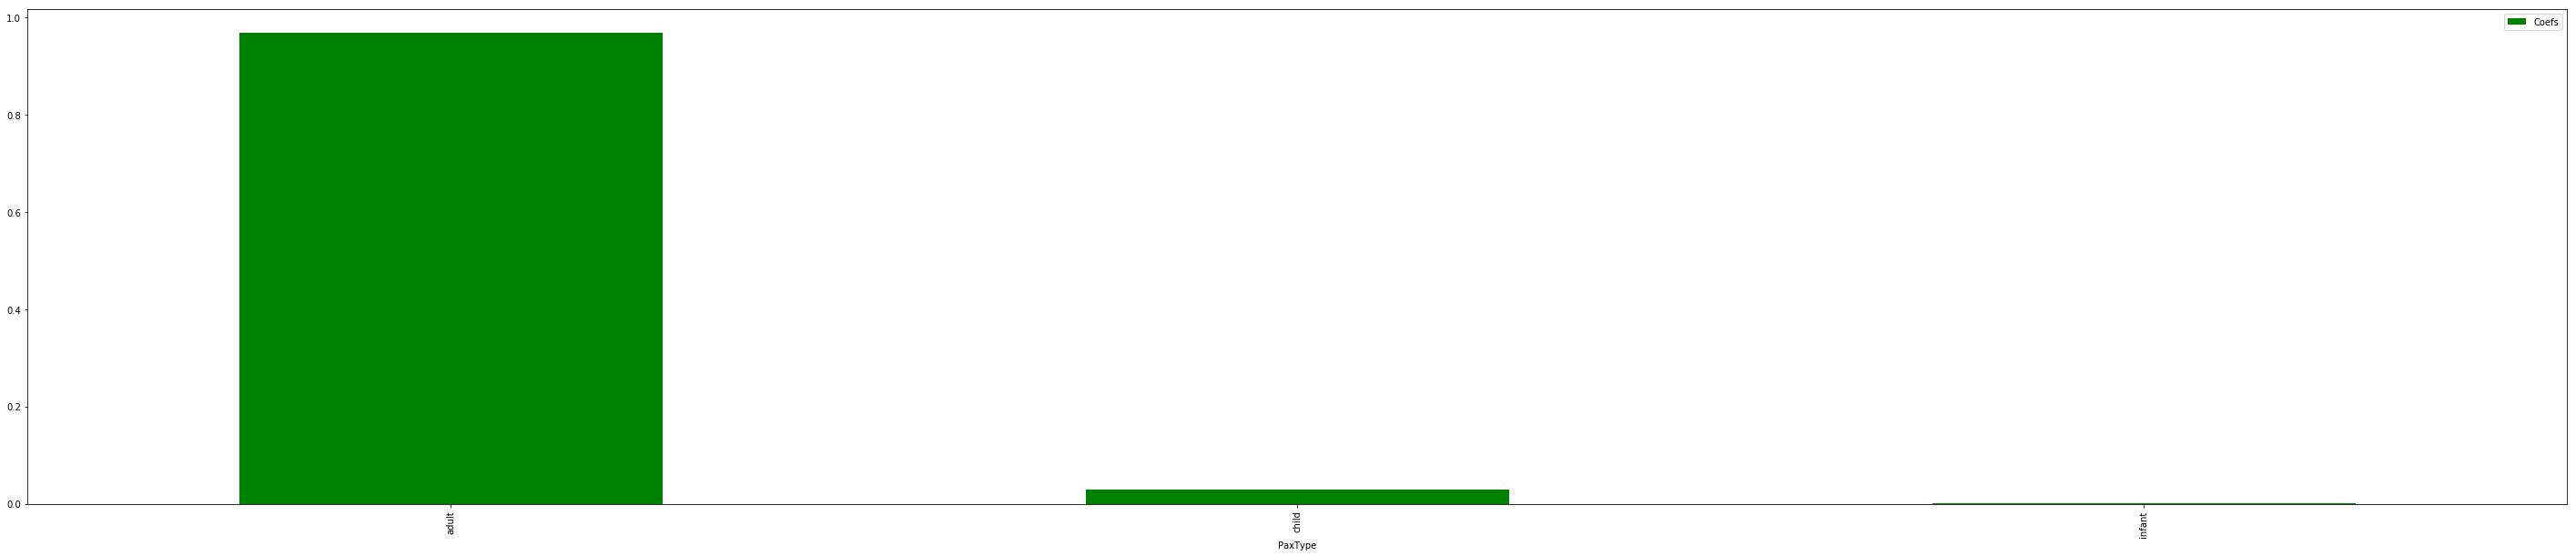

In [35]:
coefs_df.set_index('PaxType', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

=========================================================================================================================

## Out come
There are so many features in the dataset, that will reveal hotel popularity , popular destinations and travelers preferences.  AS outcome of this analysis we can summarize below information. Bases that hotels can get decisions about their sales and travelers can get decisions about their vacations.
The below point will be revealed from above analysis;

===============================================================================================================================
- Popular destination
- Populer Guest pax combination pattern
- Populer stay period
- Populer departure dates
- Daily search count with time


===============================================================================================================================
